Import libraries

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from metrics import print_evaluation_metrics

Load dataset and prepare df

In [53]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date_reported"
target_column = "New_deaths"
df = pd.read_csv(file_path, parse_dates=True)
df = df[[date_column, target_column]]

df = df.groupby(date_column).sum().reset_index()
df.set_index(date_column, inplace=True)
df = df.dropna()
dates = df.index.values

Train test split

In [54]:
data_length = len(df)
train_split = 0.9
train = df.iloc[:int(data_length*train_split)]
test = df.iloc[int(data_length*train_split):]

Parameter tuning for order

In [55]:
stepwise_fit = auto_arima(df[target_column], trace=True, suppress_warnings=True)
best_order = stepwise_fit.order

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=25842.497, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=26938.672, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=26577.770, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=26050.334, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26936.672, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=25888.229, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=26029.229, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=25790.349, Time=0.53 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=26039.943, Time=0.12 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=25820.587, Time=0.71 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=25703.637, Time=0.78 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=25864.228, Time=0.51 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=25781.779, Time=0.97 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=25752.190, Time=0.77 sec
 ARIMA(2,1,4)(0,0,0

Create Model

In [56]:
model = ARIMA(train[target_column], order=best_order)
model = model.fit()
model.summary()

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             New_deaths   No. Observations:                 1278
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -11433.727
Date:                Thu, 25 Jan 2024   AIC                          22889.453
Time:                        16:13:04   BIC                          22946.128
Sample:                    01-03-2020   HQIC                         22910.737
                         - 07-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0764      0.070      1.095      0.274      -0.060       0.213
ar.L2         -0.8644      0.063    -13.807      0.000      -0.987      -0.742
ar.L3         -0.2291      0.098     -2.329      0.020      -0.422      -0.036
ar.L4         -0.4108      0.059     -6.958      0.000      -0.527      -0.295
ar.L5         -0.6930      0.065    -10.728      0.000      -0.820      -0.566
ma.L1         -1.2466      0.092    -13.591      0.000      -1.426      -1.067
ma.L2          1.5415      0.135     11.402      0.000       1.277       1.806
ma.L3         -1.2646      0.144     -8.761      0.000      -1.547      -0.982
ma.L4          0.9785      0.093     10.549      0.000       0.797       1.160
ma.L5         -0.3828      0.076     -5.053      0.000      -0.531      -0.234
sigma2      6.966e+06   5.15e-08   1.35e+14      0.000    6.97e+06    6.97e+06
===================================================================================
Ljung-Box (L1) (Q):                   9.42   Jarque-Bera (JB):             17611.00
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                             2.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.34e+29. Standard errors may be unstable.
"""

Plot the result

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


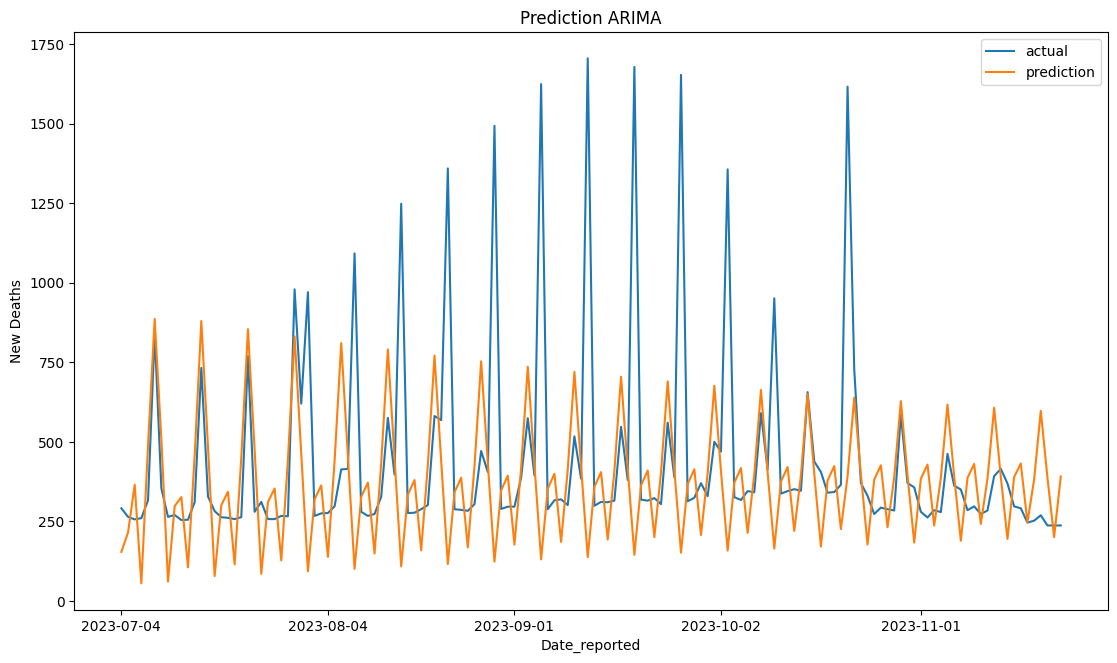

In [57]:
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=start, end=end, typ="levels")

fig, ax = plt.subplots(1, 1, figsize=(1280 / 96, 720 / 96))
ax.plot(dates[int(data_length*train_split):], test[target_column].values, label="actual")
ax.plot(dates[int(data_length*train_split):], list(pred), label="prediction")
ax.set_title("Prediction ARIMA")
ax.set_ylabel("New Deaths")
ax.set_xlabel(date_column)
ax.legend()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()

RMSE of the result

In [58]:
print_evaluation_metrics(pred, test[target_column])

Evaluation Metrics:
MSE: 150862.98
RMSE: 388.41
MAE: 205.16
MAPE: nan
SMAPE: nan
